# Comparing Models

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn

from helpers import load_images, load_labels, visualize_image, get_edges, generate_intermediate_edge_labels

## Set Device to Cuda

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"We will be using device: {device}")

We will be using device: cuda


## Get Test Data and Sub Labels

In [3]:
horizontal_kernel = np.array([
    [-1, -1, -1],
    [ 0,  0 , 0],
    [ 1,  1,  1],
])

vertical_kernel = np.array([
    [-1,  0,  1],
    [-1,  0,  1],
    [-1,  0,  1],
])

In [4]:
# test data
test_images = load_images("./data/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte")
test_labels = load_labels("./data/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte")

# sub labels
test_horizontal_image_labels = generate_intermediate_edge_labels(test_images, horizontal_kernel)
test_vertical_image_labels = generate_intermediate_edge_labels(test_images, vertical_kernel)

In [5]:
def get_sample(idx):
    return test_images[idx], test_labels[idx], test_horizontal_image_labels[idx].reshape(28, 28), test_vertical_image_labels[idx].reshape(28, 28)

In [6]:
img, label, h_edge, v_edge = get_sample(0)

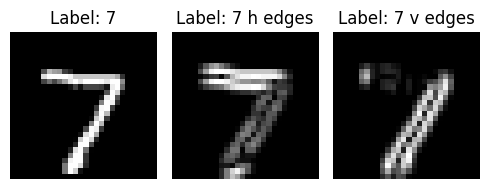

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(5, 5))

visualize_image(img, label, ax=axes[0])
visualize_image(h_edge, f"{label} h edges", ax=axes[1])
visualize_image(v_edge, f"{label} v edges", ax=axes[2])

plt.tight_layout()
plt.show()

## Load Models

In [18]:
main_quest_model = torch.load("./main_quest.pth")
side_quest_model = torch.load("./side_quests.pth")
partial_side_quest_model = torch.load("./partial_side_quests.pth")

## Comparing Layer Weights Across Models

In [19]:
main_quest_model.eval()

AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

In [12]:
main_h_weights = np.abs(main_quest_model.horizontal_layer.weight[0].reshape(28, 28).detach().cpu().numpy())
side_h_weights = np.abs(side_quest_model.horizontal_layer.weight[0].reshape(28, 28).detach().cpu().numpy())
partial_h_weights = np.abs(partial_side_quest_model.horizontal_layer.weight[0].reshape(28, 28).detach().cpu().numpy())

AttributeError: 'collections.OrderedDict' object has no attribute 'horizontal_layer'

In [ ]:
def convert_numpy_image_to_tensor(img):
    """
    """
    return torch.from_numpy(img.copy()).float().unsqueeze(0).unsqueeze(0).to('cuda')
    